In [1]:
## Importing Libraries
import helper_functions
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
#Importing the Datasets

df = helper_functions.create_dataframe("movie_contents.json", "movie_budget.json")
#Looking at the dataset
df.columns

Index(['title_year', 'storyline', 'contentRating', 'movie_imdb_link', 'color',
       'country', 'keywords', 'num_voted_users', 'duration_sec',
       'num_critic_for_reviews',
       ...
       'Golden Globe_nominated_14', 'Golden Globe_nominated_15',
       'Golden Globe_nominated_16', 'BAFTA Film Award_won_5',
       'BAFTA Film Award_nominated_10', 'BAFTA Film Award_won_6',
       'BAFTA Film Award_nominated_11', 'Oscar_nominated_11',
       'BAFTA Film Award_won_7', 'BAFTA Film Award_won_8'],
      dtype='object', length=107)

In [3]:
df.head(10)

,title_year,storyline,contentRating,movie_imdb_link,color,country,keywords,num_voted_users,duration_sec,num_critic_for_reviews,...,Golden Globe_nominated_14,Golden Globe_nominated_15,Golden Globe_nominated_16,BAFTA Film Award_won_5,BAFTA Film Award_nominated_10,BAFTA Film Award_won_6,BAFTA Film Award_nominated_11,Oscar_nominated_11,BAFTA Film Award_won_7,BAFTA Film Award_won_8
0,1997,Baby George got into a plane crash in a jungle...,PG,http://www.imdb.com/title/tt0119190/,Color,USA,male objectification|jungle|heiress|hero|anima...,None,5520.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,Jim Levenstein has finally found the courage t...,R,http://www.imdb.com/title/tt0328828/,Color,USA|Germany,wedding|friend|bachelor party|gym|pay phone,None,5760.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,"In The Equalizer, Denzel Washington plays McCa...",R,http://www.imdb.com/title/tt0455944/,Color,USA,mysterious past|gangster|ex soldier|assassin|h...,None,7920.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995,Furious that her late father only willed her h...,PG,http://www.imdb.com/title/tt0112642/,Color,USA,ghost|casper|mansion|friendly ghost|maine,None,6000.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,Phil and Claire Foster are a couple who have b...,PG-13,http://www.imdb.com/title/tt1279935/,Color,USA,reservation|city|night|restaurant|new york city,None,5280.0,247.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2002,Marisa Ventura is a single mother born and bre...,PG-13,http://www.imdb.com/title/tt0252076/,Color,USA,place name in title|hotel|maid|the bronx|new y...,None,6300.0,111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1995,When some Russian rebels takes control of some...,R,http://www.imdb.com/title/tt0112740/,Color,USA,order|submarine|alabama|radio|mutiny,None,6960.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005,The husband of aviation engineer Kyle Pratt ha...,PG-13,http://www.imdb.com/title/tt0408790/,Color,USA,flight attendant|disappearance|child|containme...,None,5880.0,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1994,"Sexual harassment is the theme, but here it is...",R,http://www.imdb.com/title/tt0109635/,Color,USA,non statutory female on male rape|sexual haras...,None,7680.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1998,Seth is an angel who accompanies the spirits o...,PG-13,http://www.imdb.com/title/tt0120632/,Color,Germany|USA,angel|heart surgeon|doctor|fall|hospital,None,6840.0,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#GET THE NUMBER OF AWARDS

df.set_index('movie_title', inplace=True, drop=False)
df.sort_index(inplace=True)
awards_columns = [col for col in df.columns if 'nominated' in col or 'won' in col]
df_awards = df[awards_columns]
awards_per_movie = (len(awards_columns) - df_awards.isnull().sum(axis=1)).to_dict()
df['nb_awards'] = df['movie_title'].map(awards_per_movie)
df = df.drop_duplicates(['movie_title'])
df = df.rename(columns = {'director_fb_links': 'director_fb_likes'})

# Visualization and comparaisons between variables and their for each movie


## Awards and Gross

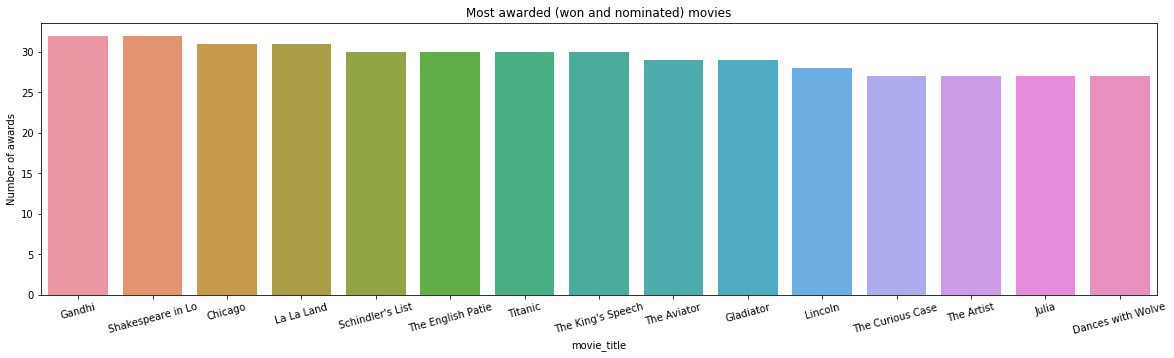

In [5]:
# Plotting the 15 most awarded movies
d = df['nb_awards'].sort_values(ascending=False)[:15]
plt.figure(figsize=(20,5))
plot = sns.barplot(x=d.index, y=d)
_ = plot.set_xticklabels([elem[:17] for elem in d.index], rotation=15)
_ = plot.set_title('Most awarded (won and nominated) movies')
_ = plot.set_ylabel('Number of awards')

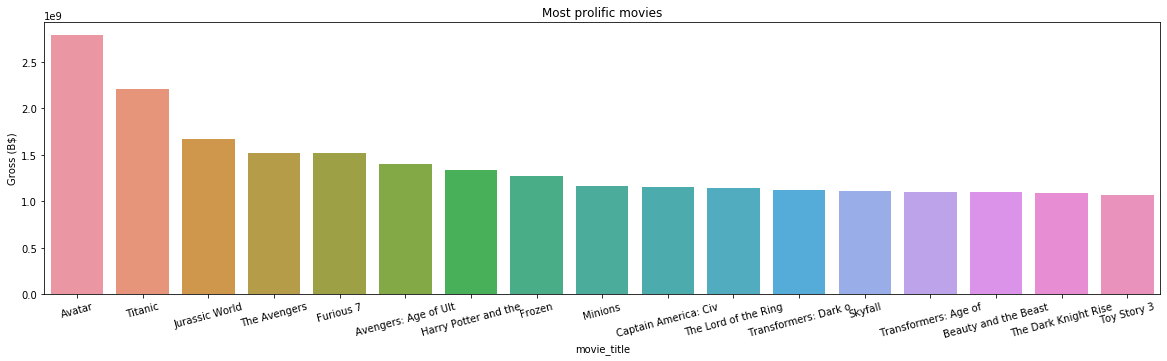

In [6]:
## Movies that got the biggest gross

d = df.worldwide_gross.sort_values(ascending=False)[:17]
plt.figure(figsize=(20,5))
plot = sns.barplot(x=d.index, y=d)
_ = plot.set_xticklabels([elem[:20] for elem in d.index], rotation=15)
_ = plot.set_title('Most prolific movies')
_ = plot.set_ylabel('Gross (B$)')

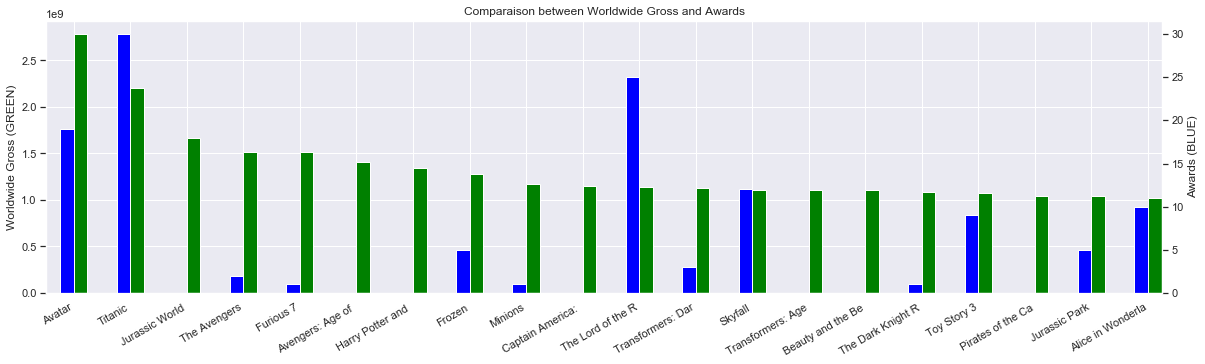

In [7]:
# Comparaison between the movies gross and awards
sns.set()

d = df.worldwide_gross.sort_values(ascending=False)[:20]
e = df_awards[df_awards.index.isin(d.index)].isnull().sum(axis=1)
e = len(awards_columns) - e[~e.index.duplicated(keep='first')].reindex(d.index)
margin = 0.05
width = 4*(1.-2.*margin)/15
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
d.plot(kind='bar', color='green', ax=ax, width=width, position=0)
e.plot(kind='bar', color='blue', ax=ax2, width=width, position=1)
ax.set_ylabel('Worldwide Gross (GREEN)')
ax2.set_ylabel('Awards (BLUE)')
ax.set_xlabel('')
ax.set_title('Comparaison between Worldwide Gross and Awards')
_ = ax.set_xticklabels([elem[:17] for elem in d.index], rotation = 30, ha='right')
ax2.grid(False)

## Facebook Likes

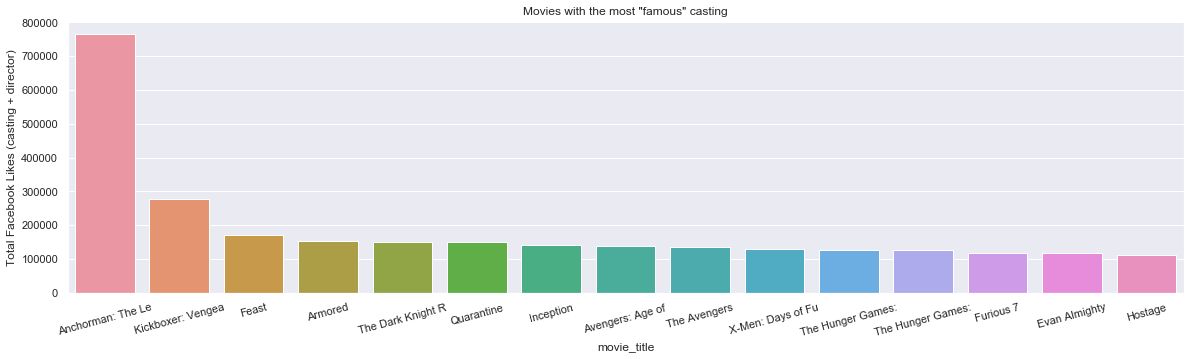

In [8]:
d = df['total_cast_fb_likes'].sort_values(ascending=False)[:15]
e = df[df.index.isin(d.index)].num_facebook_like
plt.figure(figsize=(20,5))
plot = sns.barplot(x=d.index, y=d)
_ = plot.set_xticklabels([elem[:17] for elem in d.index], rotation=15)
_ = plot.set_title('Movies with the most "famous" casting')
_ = plot.set_ylabel('Total Facebook Likes (casting + director)')

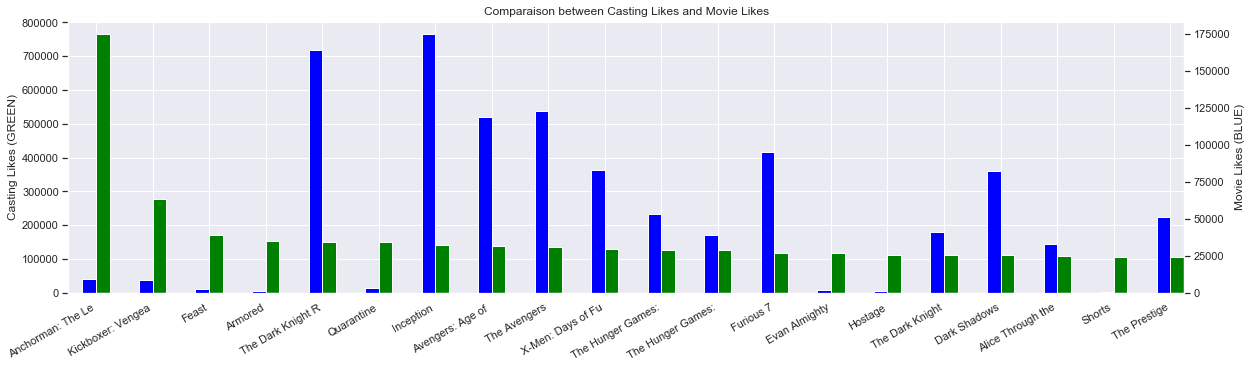

In [9]:
sns.set()

d = df['total_cast_fb_likes'].sort_values(ascending=False)[:20]
e = df[df.index.isin(d.index)].num_facebook_like.reindex(d.index)
margin = 0.05
width = 4*(1.-2.*margin)/15
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
d.plot(kind='bar', color='green', ax=ax, width=width, position=0)
e.plot(kind='bar', color='blue', ax=ax2, width=width, position=1)
ax.set_ylabel('Casting Likes (GREEN)')
ax2.set_ylabel('Movie Likes (BLUE)')
ax.set_xlabel('')
ax.set_title('Comparaison between Casting Likes and Movie Likes')
_ = ax.set_xticklabels([elem[:17] for elem in d.index], rotation = 30, ha='right')
ax2.grid(False)

## Top Actors

In [10]:
all_actors = [actor for actor in list(set(list(df.actor_1_name) + list(df.actor_2_name) + list(df.actor_3_name))) if pd.notnull(actor)]
imdb_score_per_actor = {}
for actor in all_actors:
    imdb_score_per_actor[actor] = df[(df.actor_1_name == actor) | (df.actor_2_name == actor) | (df.actor_3_name == actor)].idmb_score.mean()

In [11]:
gross_per_actor = {}
for actor in all_actors:
    gross_per_actor[actor] = df[(df.actor_1_name == actor) | (df.actor_2_name == actor) | (df.actor_3_name == actor)].worldwide_gross.mean()

In [12]:
millnames = ['',' K',' M',' B']
def millify(n):
    if pd.notnull(n):
        n = float(n)
        millidx = max(0,min(len(millnames)-1,
                            int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))
        return '{:.1f}{}'.format(n / 10**(3 * millidx), millnames[millidx])
    else:
        return n
mini_movie = 3
top_k = 3
best_mini_gross = sorted([(k,v) for k,v in sorted(gross_per_actor.items(), key=lambda x:x[1], reverse=True) if len(df[(df.actor_1_name == k) 
                                                                                                           | (df.actor_2_name == k) 
                                                                                                           | (df.actor_3_name == k)]) >= mini_movie], key=lambda x:x[1], reverse=True)[:20]

best_mini_gross_str = [elem[0]+ ', %s (%s movie.s)' % (millify(elem[1]),len(df[(df.actor_1_name == elem[0]) 
                                                   | (df.actor_2_name == elem[0]) 
                                                   | (df.actor_3_name == elem[0])])) for elem in best_mini_gross][:top_k]

best_mini = [(k,v) for k,v in sorted(imdb_score_per_actor.items(), key=lambda x:x[1], reverse=True) if len(df[(df.actor_1_name == k) 
                                                                                                   | (df.actor_2_name == k) 
                                                                                                   | (df.actor_3_name == k)]) >= mini_movie][:20]

best_mini_str = [elem[0]+ ', %s (%s movie.s)' % (round(elem[1], 2),len(df[(df.actor_1_name == elem[0]) 
                                                   | (df.actor_2_name == elem[0]) 
                                                   | (df.actor_3_name == elem[0])])) for elem in best_mini][:top_k]

In [14]:
print('The {} best actors are (with minimum {} movies) : \n{}'.format(top_k, mini_movie,
       '\n'.join(best_mini_str)))

print('\nThe {} most prolific actors are (with minimum {} movies) : \n{}'.format(top_k, mini_movie,
       '\n'.join(best_mini_gross_str)))

The 3 best actors are (with minimum 3 movies) : 
Mark Hamill, 8.63 (3 movie.s)
Richard Attenborough, 8.03 (3 movie.s)
Gene Wilder, 7.87 (3 movie.s)

The 3 most prolific actors are (with minimum 3 movies) : 
Sam Worthington, 1.0 B (3 movie.s)
Daniel Radcliffe, 876.9 M (4 movie.s)
Richard Armitage, 825.8 M (4 movie.s)


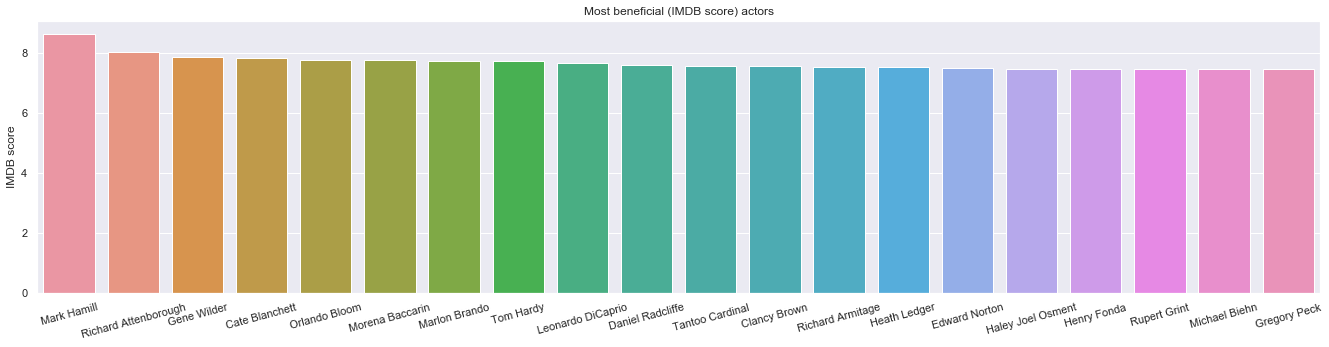

In [13]:
plt.figure(figsize=(23,5))

plot = sns.barplot([elem[0] for elem in best_mini], [elem[1] for elem in best_mini])
_ = plot.set_xticklabels([elem[0] for elem in best_mini], rotation=15)
_ = plot.set_title('Most beneficial (IMDB score) actors')
_ = plot.set_ylabel('IMDB score')

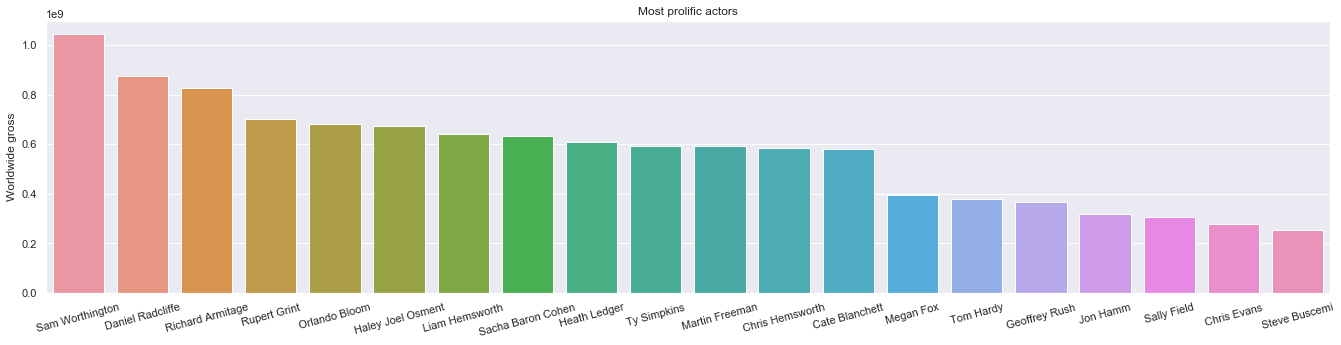

In [15]:
plt.figure(figsize=(23,5))
plot = sns.barplot([elem[0] for elem in best_mini_gross], [elem[1] for elem in best_mini_gross])
_ = plot.set_xticklabels([elem[0] for elem in best_mini_gross], rotation=15)
_ = plot.set_title('Most prolific actors')
_ = plot.set_ylabel('Worldwide gross')